Inductive Reasoning is making generalized claims based off of specific patterns that you notice in a data set. For example lets say that I have a sorting algorithim which sorts numbers in an acending order, and in one of my test lists it is successful, I would then generalize and make the claim that my algorithim can sort any list of numbers correctly, and although this is likely true, you do not know that for certain. (Specific case applied generally)

Deductive Reasoning is the oppostie, you use a well known theorem or general rule and apply it to a specific case. For example lets say that I have a general rule of "If a program has no infinite loops, it will eventually terminate." And my specific program has no infinte loops, then I can deduce that it will at somepoint terminate. (General rule applied to a specific case)


In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cdl_df = pd.read_csv("Credit_card_label.csv")
cd_df = pd.read_csv("Credit_card.csv")
cd_df.head(3)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2


In [402]:
from sklearn.impute import SimpleImputer

imputer =  SimpleImputer(missing_values=np.nan, strategy='mean')
cols_to_impute_numeric = ['Annual_income','Birthday_count']
cd_df[cols_to_impute_numeric] = imputer.fit_transform(cd_df[cols_to_impute_numeric])
    

imputer =  SimpleImputer(missing_values=np.nan, strategy = 'most_frequent' )
cols_to_impute_string = ['GENDER','Type_Occupation']
cd_df[cols_to_impute_string] = imputer.fit_transform(cd_df[cols_to_impute_string])
cd_df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [403]:
df = pd.merge(cd_df, cdl_df, on='Ind_ID', how="outer")
df = df.drop(columns=['Ind_ID','Mobile_phone'], axis=1)
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Laborers,2,1
1,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,0,0,0,Laborers,4,0
2,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,0,0,0,Core staff,1,0


In [404]:
number_columns = ['GENDER', 'Car_Owner', 'Propert_Owner']
other_columns = ['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

In [405]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in number_columns:
    df[i] = le.fit_transform(df[i])


In [406]:
df = pd.get_dummies(df, columns = other_columns, dtype=int)
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.0,-18772.0,365243,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,2,135000.0,-15761.0,-3173,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,247500.0,-17016.0,-1347,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [407]:
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.0,-18772.0,365243,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,2,135000.0,-15761.0,-3173,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,247500.0,-17016.0,-1347,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [408]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('label',axis=1)
y = df['label']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [409]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import tree
from imblearn.under_sampling import ClusterCentroids
rus = ClusterCentroids(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train, y_train)
model =tree.DecisionTreeClassifier(max_depth=1000, random_state=42, criterion= 'entropy',max_leaf_nodes= 1000)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_leaf_nodes=1000,
                       random_state=42)

I improved the recall for true values by increasing the amount of maximum leaf nodes, and also the max depth, and ading the criterion "entropy". I also tried resampling but that did not really help that much. To be honest I think something is weird here.

In [410]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       412
           1       0.39      0.49      0.44        53

    accuracy                           0.86       465
   macro avg       0.66      0.70      0.68       465
weighted avg       0.87      0.86      0.86       465



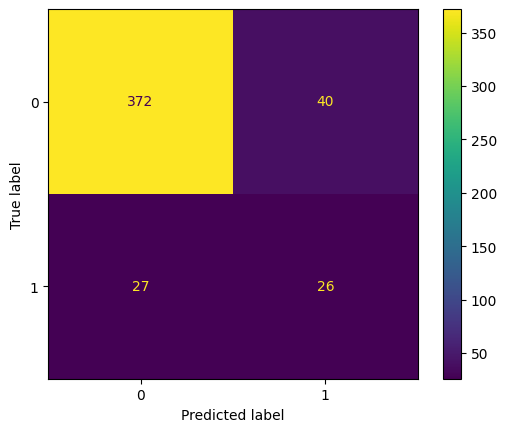

In [411]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

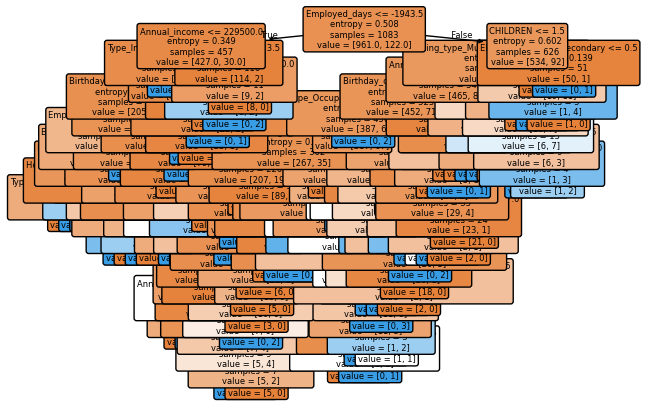

<Figure size 640x480 with 0 Axes>

In [412]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

In [413]:
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train) 
    

In [420]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight= "balanced", criterion = "entropy")
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.896774193548387

I improved the recall for true values by balancing the class weights, and also adding the criterion "entropy". 

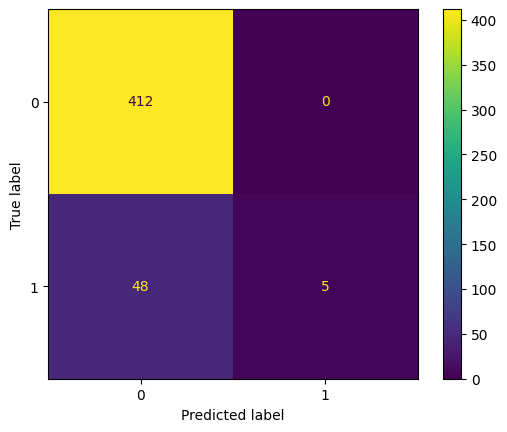

In [421]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [422]:
print(rf.feature_importances_, X.columns)

[2.60795275e-02 2.83162769e-02 2.66918857e-02 3.42257256e-02
 1.37360208e-01 1.66977432e-01 1.47816446e-01 2.14176580e-02
 3.05380184e-02 1.50823874e-02 4.41386722e-02 1.86579357e-02
 1.30860422e-02 1.00672377e-02 2.02644286e-02 1.72629984e-04
 1.91348940e-02 6.72855506e-03 3.99107060e-03 1.95105521e-02
 1.02989947e-02 2.15725974e-02 1.13102371e-02 1.36333261e-02
 5.77121286e-03 1.28533279e-03 1.53580562e-02 1.09758593e-02
 1.13894146e-03 5.04869512e-03 6.13491071e-03 6.48579223e-03
 2.22795430e-03 3.81858003e-03 1.46714864e-02 8.91358894e-03
 2.56598707e-04 5.69874313e-03 5.60534840e-03 1.93762515e-02
 1.42615454e-03 1.31115698e-02 4.95117627e-03 9.25274482e-04
 0.00000000e+00 1.27018473e-02 1.00275978e-04 5.71302798e-03
 1.23058264e-03] Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Birthday_count', 'Employed_days', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'Type_Income_Commercial associate',
       'Type_Income_Pensioner', 'Type

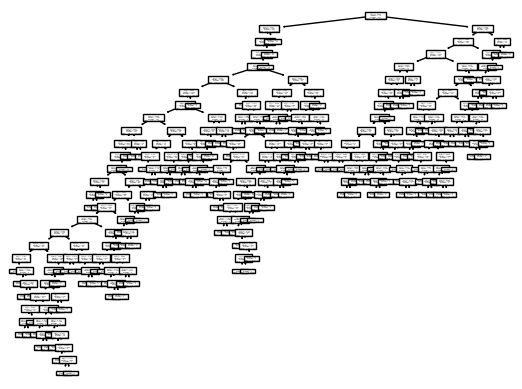

In [423]:
import matplotlib.pyplot as plt
rf_tree = rf.estimators_[4]
tree.plot_tree(rf_tree)
plt.savefig("rf_tree.svg")

I added normalizing to the confusion matrix to get higher recall 

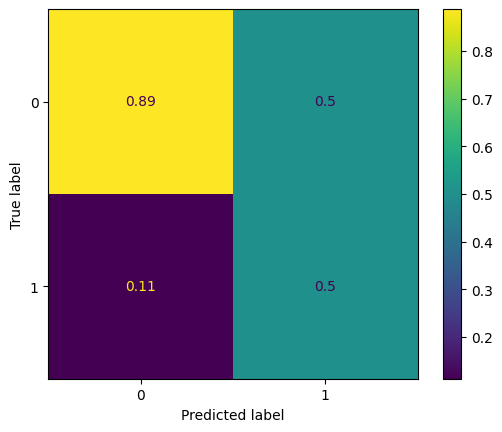

In [432]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, normalize= "pred")

In [433]:
0.5/(0.5+0.11)

0.819672131147541